# Imports e função usada

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

T = 6

#cria um vetor de valores temporais, a função foi criada para o caso de personalização de exibição de períodos
def t(numberofperiods):
    t = np.linspace(-1*numberofperiods*3, numberofperiods*3, 1000)
    return t

#sinal dado no enunciado
def x(t):
    t_mod = (t + T/2)%T - T/2

    y = np.piecewise(
        t_mod,
        [t_mod < -2, (-2 <= t_mod) & (t_mod <= -1), (-1 < t_mod) & (t_mod < 1), (1 <= t_mod) & (t_mod < 2), 2 <= t_mod],
        [lambda t_mod: 0, lambda t_mod: -2 -2*t_mod, lambda t_mod: 1, lambda t_mod: -2 + 2*t_mod, lambda t_mod: 0]
    )

    return y

#plotando uma ou duas funções no mesmo gráfico, com legendas, títulos e cores personalizadas
def plotfunction(graphTitle, xValues, xLabel, yLabel, function1, labelFunction1, colorFunction1 = 'blue',
                 function2 = None, labelFunction2 = None, colorFunction2 = 'orange'):
    
    plt.plot(xValues, function1, label= labelFunction1, color= colorFunction1)

    if function2 is not None:
        plt.plot(xValues, function2, label= labelFunction2, color= colorFunction2)

    plt.title(graphTitle)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotando o gráfico inicial

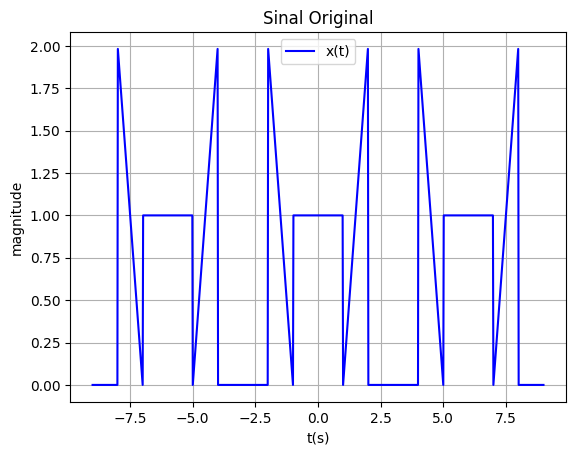

In [114]:
tValues = t(3) #valores de t

plotfunction('Sinal Original', tValues, 't(s)', 'magnitude', x(tValues), 'x(t)')

# (a) Cálculo dos coeficientes

In [115]:
def ck(k):
    omega0 = 2 * np.pi / T
    def f(t): return x(t) * np.exp(-1j * k * omega0 * t)

    # Integrar em partes, menos imprecisão das descontinuidades
    I1, _ = quad(f, -3, -2)
    I2, _ = quad(f, -2, -1)
    I3, _ = quad(f, -1, 1)
    I4, _ = quad(f, 1, 2)
    I5, _ = quad(f, 2, 3)

    return (I1 + I2 + I3 + I4 + I5) / T


a0 = ck(0) #sabemos que é um número real

print(a0.real) 
print(a0.imag) #para confirmar que é zero


0.6666666666666666
0.0


# (b) Calculando a série de fourier para as funções

In [116]:
def fourierSeries(t_array, N):
    #aplica a definição de soma de exponenciais complexas
    omega0 = 2 * np.pi / T
    return sum(ck(k) * np.exp(1j * k * omega0 * t_array) for k in range(-N, N + 1))


Série para N = 1, 10, 20, 50

In [117]:
f = x(tValues) #função original

sf1 = fourierSeries(tValues, 1)
sf10 = fourierSeries(tValues, 10)
sf20 = fourierSeries(tValues, 20)
sf50 = fourierSeries(tValues, 50)

N = 1

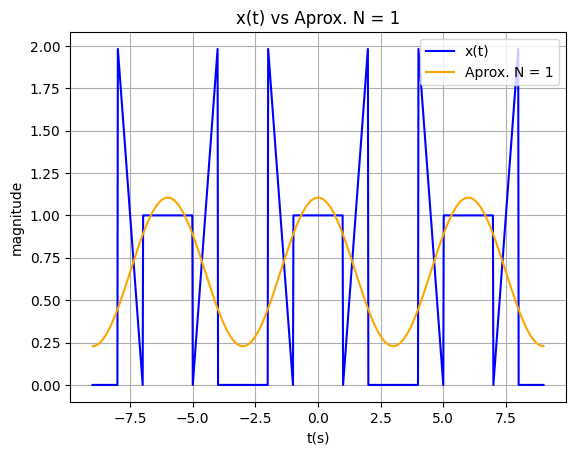

In [118]:
plotfunction('x(t) vs Aprox. N = 1', tValues, 't(s)', 'magnitude', f, 'x(t)', 'blue', sf1, 'Aprox. N = 1')

N = 10

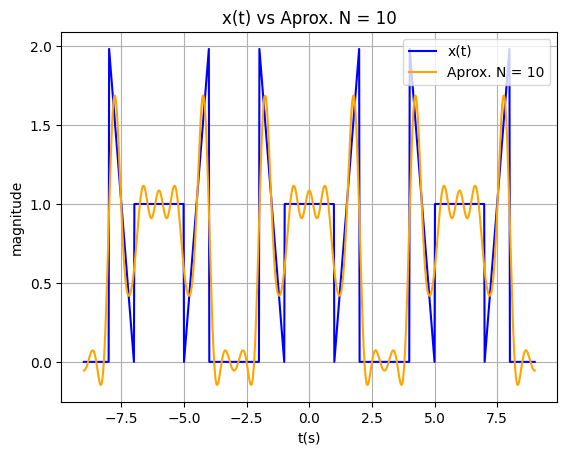

In [119]:
plotfunction('x(t) vs Aprox. N = 10', tValues, 't(s)', 'magnitude', f, 'x(t)', 'blue', sf10, 'Aprox. N = 10')

N = 20

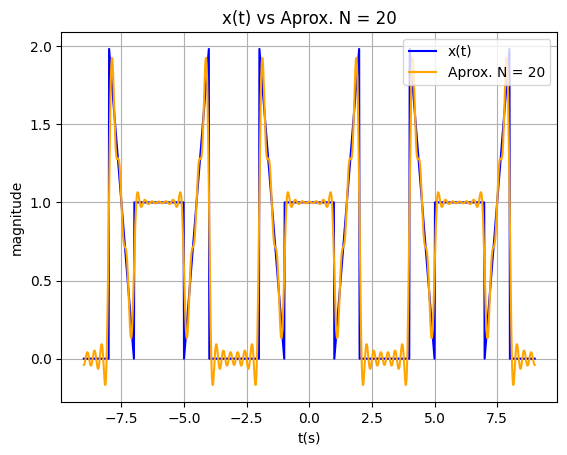

In [120]:
plotfunction('x(t) vs Aprox. N = 20', tValues, 't(s)', 'magnitude', f, 'x(t)', 'blue', sf20, 'Aprox. N = 20')

N = 50

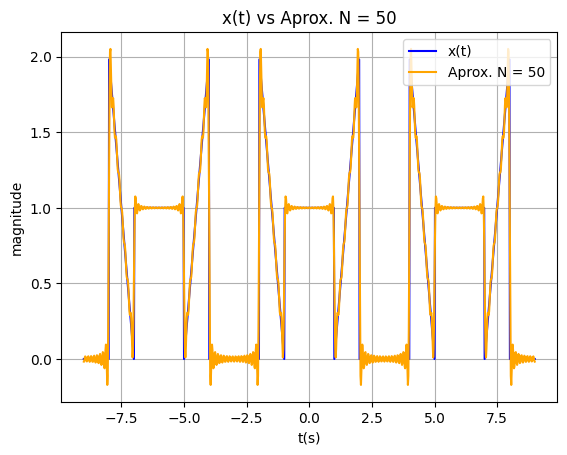

In [121]:
plotfunction('x(t) vs Aprox. N = 50', tValues, 't(s)', 'magnitude', f, 'x(t)', 'blue', sf50, 'Aprox. N = 50')

# (c) Potência Média do Erro

In [122]:
#np.mean calcula exatamente a média discreta
energyerr1 = np.abs((sf1 - f)**2)
power1 = np.mean(energyerr1)

energyerr10 = np.abs((sf10 - f)**2)
power10 = np.mean(energyerr10)

energyerr20 = np.abs((sf20 - f)**2)
power20 = np.mean(energyerr20)

energyerr50 = np.abs((sf50 - f)**2)
power50 = np.mean(energyerr50)

print(f' Potência média do erro para N = 1: {power1:.4f}')
print(f' Potência média do erro para N = 10: {power10:.4f}')
print(f' Potência média do erro para N = 20: {power20:.4f}')
print(f' Potência média do erro para N = 50: {power50:.4f}')

 Potência média do erro para N = 1: 0.2395
 Potência média do erro para N = 10: 0.0550
 Potência média do erro para N = 20: 0.0243
 Potência média do erro para N = 50: 0.0097


# (d) Cálculo dos coeficientes em função de ômega

para N = 50:

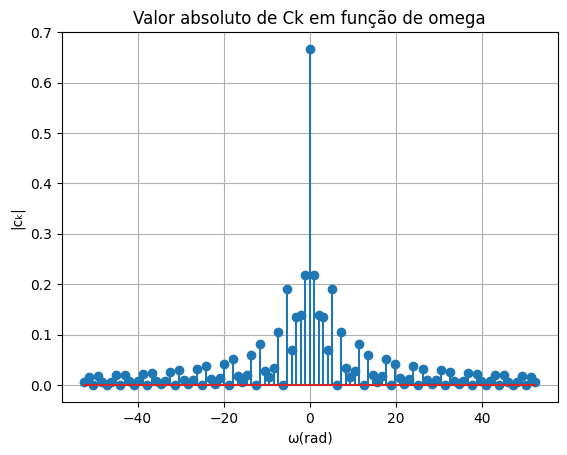

In [123]:
omega0 = 2*np.pi/T #valor da frequencia angular fundamental
ks = np.arange(-50, 51) #valores de k
omegas = ks*omega0 #todos os valores de frequencia angular dentro do intervalo de k

coef = np.array([ck(k) for k in ks]) #coeficientes da série
coef = np.abs(coef) #valor absoluto

plt.stem(omegas, coef)
plt.title('Valor absoluto de Ck em função de omega')
plt.xlabel('ω(rad)')
plt.ylabel('|cₖ|')
plt.grid(True)
plt.show()

# (e) Análise da resposta em frequência

definindo a função e intervalo

In [124]:
#função dada no enunciado
def frequencyResponse(omega):
    omegac = 10 #1/R*C
    a = omega -1j*(omegac)
    return omega/a

omegaValues = np.linspace(-100, 100, 1000) #valores de omega utilizados
H = frequencyResponse(omegaValues) 

plotando módulo

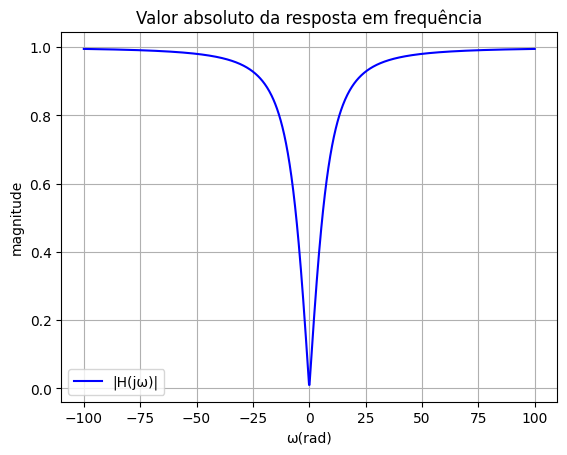

In [125]:
plotfunction('Valor absoluto da resposta em frequência', omegaValues, 'ω(rad)', 'magnitude', np.abs(H), '|H(jω)|', 'blue')

plotando fase

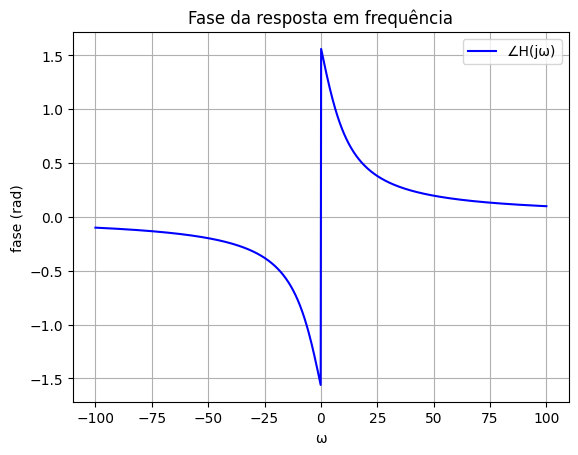

In [126]:
plotfunction('Fase da resposta em frequência', omegaValues, 'ω', 'fase (rad)', np.angle(H), '∠H(jω)', 'blue')

# (f) Aplicando o filtro na SF com N = 50

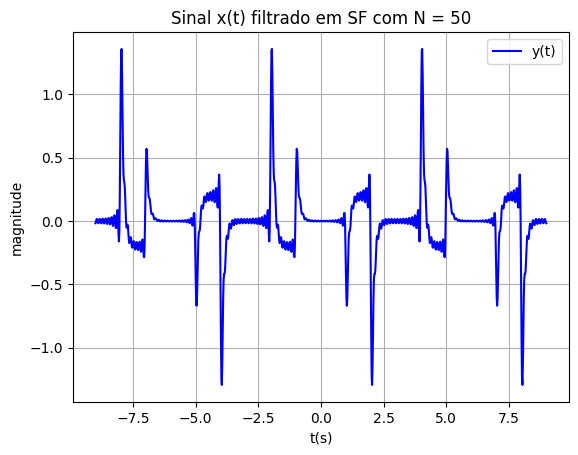

In [127]:
omega0 = 2*np.pi/T
ks = np.arange(-50, 51) #valores de k

#multiplicando  coeficientes ck, a resposta em frequência e a expoencial complexa para cada k e somando -> filtro
y = sum(ck(k)*frequencyResponse(k*omega0)*np.exp(1j*k*omega0*tValues) for k in ks) 
                                                                                    

plotfunction('Sinal x(t) filtrado em SF com N = 50', tValues, 't(s)', 'magnitude', y, 'y(t)', 'blue')